# ANALYSE DES SENTIMENTS EN TEMPS RÉEL À L'AIDE DE L'API DE 

# TWITTER

## 1.INTRODUCTION 🍀:

L'idée de ce projet est de capturer les tweets, de les analyser en fonction des mots et hashtags les plus utilisés et de les classer en fonction de leur sentiment (positif, négatif ou neutre). 

Nous utiliserons comme ensemble de données comme par exemple: les 200 derniers tweets envoyés par les  utilisateurs de twitter en temps réel ou encore dans une durée de 60 seconde ou bien plus .

Le but de ce projet est d'analyser les sentiments des users de twitter en temps réel et comparer entre BIDEN et TRUMP en ce qui concerne les sentiments des utilisateurs en temps réel.


# 2.LES LIBRAIRIES 📚 :


In [58]:
import sys
import tweepy
import csv
import numpy as np
import re
re.compile('<title>(.*)</title>')
import time
import re
import pandas as pd
import nltk
from nltk.stem.porter import *
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)


#  3.TWITTER API KEYS 🔑 :

In [59]:
consumer_key = 'xxxx' #il faut créer une application chez twitter et puis recevoir ces api keys
consumer_secret = 'xxxxxx'
access_token = 'xxxxxxx'
access_token_secret = 'xxxxxxxxxx'

In [60]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

#### LES 5 TWEETS D'UN USER ID EN TEMPS REEL :

In [61]:
tweets = api.user_timeline('@JoeBiden', count=5, tweet_mode='extended')
for t in tweets:
    print(t.full_text)
    print()

The American people have sacrificed so much to fight this virus — we've lost lives, businesses, paychecks. And now, we're losing the progress we've made because this president refuses to do his job.

Donald Trump has failed our nation every step of the way. https://t.co/k5CCKcJzjZ

While President Trump continues his victory lap, over 20 million Americans remain out of work. He may have forgotten about you, but I never will — and I'll fight for you every single day in the White House. https://t.co/cuBH5ufI2f

While the Trump Administration continues their efforts to rip health care away from millions, I'm speaking about how we can make quality, affordable health care available to every American.  Tune in: https://t.co/CJ8KWt4Z2M

Health care workers are selflessly risking their lives every day on the front lines of the fight against COVID-19 — and hundreds have paid the ultimate price.

They are American heroes — and we cannot forget the sacrifices they made to care for us all. https:/

#### CREATION D'UNE LISTE DE TWEETS : 

In [62]:

def list_tweets(user_id, count, prt=False):
    tweets = api.user_timeline(
        "@" + user_id, count=count, tweet_mode='extended')
    tw = []
    for t in tweets:
        tw.append(t.full_text)
        if prt:
            print(t.full_text)
            print()
    return tw

In [63]:
user_id = 'JoeBiden' 
count=200

In [64]:
tw_joe = list_tweets(user_id, count)

In [65]:
type(tw_joe)

list

In [66]:
tw_joe[3]

'Health care workers are selflessly risking their lives every day on the front lines of the fight against COVID-19 — and hundreds have paid the ultimate price.\n\nThey are American heroes — and we cannot forget the sacrifices they made to care for us all. https://t.co/JBlSo0mYdb'

# 4.CLEANING DE LA DATASET :

In [67]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

In [68]:
def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")

    return lst

In [69]:
tw_joe = clean_tweets(tw_joe)

In [70]:
tw_joe[3]

'Health care workers are selflessly risking their lives every day on the front lines of the fight against COVID-19 — and hundreds have paid the ultimate price.\n\nThey are American heroes — and we cannot forget the sacrifices they made to care for us all. '

#### LIBRAIRIES D'ANALYSE DES SENTIMENTS

In [21]:
import requests
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

# 5.L'ANALYSE DES SENTIMENTS DES TWEETS:

In [71]:
def sentiment_analyzer_scores(text, engl=True):
    if engl:
        trans = text
    else:
        trans = translator.translate(text).text

    score = analyser.polarity_scores(trans)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1

In [72]:
sentiment_analyzer_scores(tw_joe[3])

1

In [73]:
def anl_tweets(lst, title='Tweets Sentiment', engl=True ):
    sents = []
    for tw in lst:
        try:
            st = sentiment_analyzer_scores(tw, engl)
            sents.append(st)
        except:
            sents.append(0)
    ax = sns.distplot(
        sents,
        kde=False,
        bins=3)
    ax.set(xlabel='Negative                Neutral                 Positive',
           ylabel='#Tweets',
          title="Tweets of @"+title)
    return sents


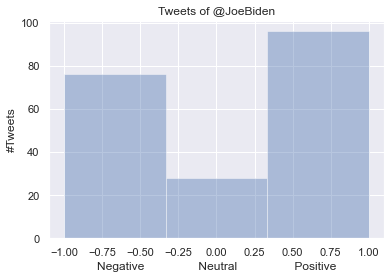

In [74]:
tw_joe_sent = anl_tweets(tw_joe, user_id)


#### Visualization de la dataset avec WordCloud


In [75]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)

    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

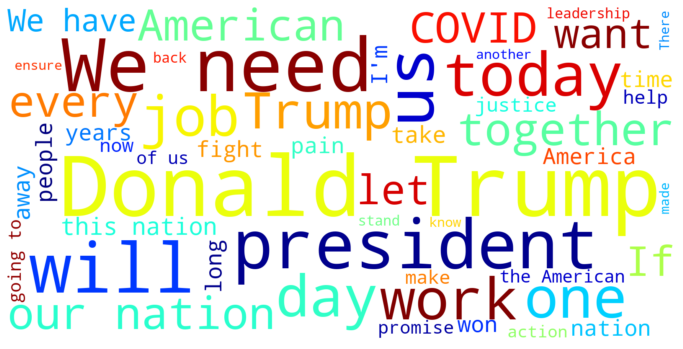

In [76]:
word_cloud(tw_joe)

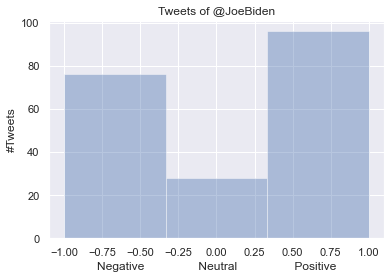

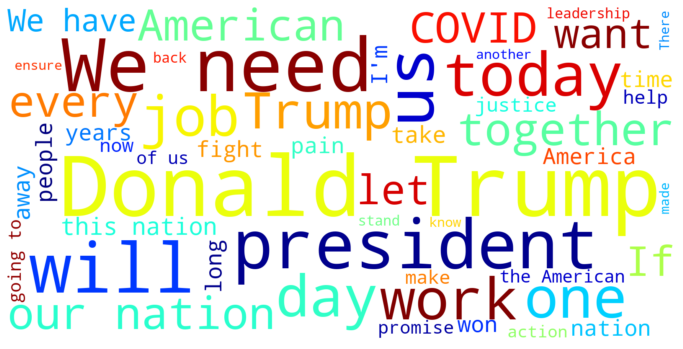

In [77]:
user_id = 'JoeBiden' 
tw_trump = list_tweets(user_id, count)
tw_trump= clean_tweets(tw_trump)
tw_trump_sent = anl_tweets(tw_trump, user_id)
word_cloud(tw_trump)

# 6.Ouverture d'un fichier et lancez la diffusion en streaming pour un filtre spécifique pendant un temps delta 

### TRACK:

 Une liste de phrases séparées par des virgules qui seront utilisées pour déterminer quels Tweets seront diffusés sur le flux. Une phrase peut être composée d'un ou plusieurs termes séparés par des espaces, et une phrase correspondra si tous les termes de la phrase sont présents dans le Tweet, quel que soit l'ordre et en ignorant la casse. Selon ce modèle, vous pouvez considérer les virgules comme des OU logiques, tandis que les espaces sont équivalents à des ET logiques (par exemple, "le twitter" est le twitter ET, et "le,twitter" est le twitter OU).


### LANGUAGE:

Ce paramètre peut être utilisé sur tous les terminaux de streaming, sauf mention explicite. En réglant ce paramètre sur une liste d'identificateurs de langue BCP 47 séparés par des virgules et correspondant à l'une des langues énumérées sur la page de recherche avancée de Twitter, vous ne trouverez que les Tweets qui ont été détectés comme étant écrits dans les langues spécifiées. Par exemple, la connexion avec language=en ne diffusera que les Tweets détectés comme étant en langue anglaise. Autres codes de langue :

en : Anglais
es : Espagnol
pt : Portugais

### LOCATIONS :

Une liste de paires de longitude et de latitude séparées par des virgules, spécifiant un ensemble de cases limitantes pour filtrer les tweets. Seuls les Tweets géolocalisés tombant dans les boîtes limites demandées seront inclus - contrairement à l'API de recherche, le champ de localisation de l'utilisateur n'est pas utilisé pour filtrer les Tweets. Chaque boîte de délimitation doit être spécifiée comme une paire de paires de longitude et de latitude, le coin sud-ouest de la boîte de délimitation venant en premier. Par exemple, le coin sud-ouest de la boîte englobante doit être placé en premier :

-122.75,36.8,-121.75,37.8 ==> San Francisco
-74,40,-73,41 ==> New York City
-122,75,36,8,-121,75,37,8,-74,40,-73,41 ==> San Francisco OU New York

In [78]:
def twitter_stream_listener(file_name,
                            filter_track,
                            follow=None,
                            locations=None,
                            languages=None,
                            time_limit=20):
    class CustomStreamListener(tweepy.StreamListener):
        def __init__(self, time_limit):
            self.start_time = time.time()
            self.limit = time_limit
            # self.saveFile = open('abcd.json', 'a')
            super(CustomStreamListener, self).__init__()

        def on_status(self, status):
            if (time.time() - self.start_time) < self.limit:
                print(".", end="")
                # Writing status data
                with open(file_name, 'a') as f:
                    writer = csv.writer(f)
                    writer.writerow([
                        status.author.screen_name, status.created_at,
                        status.text
                    ])
            else:
                print("\n\n[INFO] Closing file and ending streaming")
                return False

        def on_error(self, status_code):
            if status_code == 420:
                print('Encountered error code 420. Disconnecting the stream')
                # returning False in on_data disconnects the stream
                return False
            else:
                print('Encountered error with status code: {}'.format(
                    status_code))
                return True  # Don't kill the stream

        def on_timeout(self):
            print('Timeout...')
            return True  # Don't kill the stream

    # Writing csv titles
    print(
        '\n[INFO] Open file: [{}] and starting {} seconds of streaming for {}\n'
        .format(file_name, time_limit, filter_track))
    with open(file_name, 'w') as f:
        writer = csv.writer(f)
        writer.writerow(['author', 'date', 'text'])

    streamingAPI = tweepy.streaming.Stream(
        auth, CustomStreamListener(time_limit=time_limit))
    streamingAPI.filter(
        track=filter_track,
        follow=follow,
        locations=locations,
        languages=languages,
    )
    f.close()

In [79]:
filter_track = ['JoeBiden', 'vote']
file_name = 'JoeBidenelection.csv'
twitter_stream_listener (file_name, filter_track, time_limit=60)


[INFO] Open file: [JoeBidenelection.csv] and starting 60 seconds of streaming for ['JoeBiden', 'vote']

...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [90]:
file_name = 'JoeBidenelection.csv'
df_tws = pd.read_csv(file_name)
df_tws.shape

(1010, 3)

In [81]:
df_tws.head()

,author,date,text
0,Calendula2016,2020-06-25 22:35:40,RT @ReneeCarrollAZ: GREAT NEWS 👏👏\n\nMy Pillow...
1,suewood22300171,2020-06-25 22:35:40,RT @ThePubliusUSA: John Bolton says Donald Tru...
2,dayedreamblue,2020-06-25 22:35:40,RT @ujiforlife: ‼️ ANOTHER VOTINGS. ‼️\n\nFAN...
3,Carrie347,2020-06-25 22:35:40,@TheRickWilson This is an attempt to make Dems...
4,Roman3MP1R3,2020-06-25 22:35:40,DO. NOT. GET. LAZY. STILL. GO. VOTE.


In [91]:
df_tws['text'] =  clean_tweets(df_tws['text'])

In [92]:
df_tws.head()

,author,date,text
0,Calendula2016,2020-06-25 22:35:40,GREAT NEWS 👏👏\n\nMy Pillow's Mike Lindell is ...
1,suewood22300171,2020-06-25 22:35:40,John Bolton says Donald Trump is categoricall...
2,dayedreamblue,2020-06-25 22:35:40,‼️ ANOTHER VOTINGS. ‼️\n\nFAN PLUS APP: THE ...
3,Carrie347,2020-06-25 22:35:40,This is an attempt to make Dems think shit is...
4,Roman3MP1R3,2020-06-25 22:35:40,DO. NOT. GET. LAZY. STILL. GO. VOTE.


# 7.ANALYSE DES SENTIMENTS DES TWEETS DES UTILISATEURS:

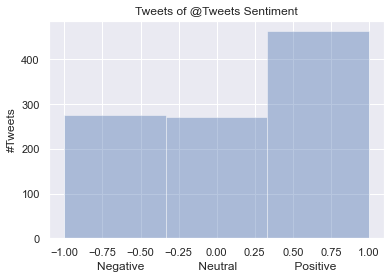

In [93]:
df_tws['sent'] = anl_tweets(df_tws.text)

In [94]:
df_tws.head()

,author,date,text,sent
0,Calendula2016,2020-06-25 22:35:40,GREAT NEWS 👏👏\n\nMy Pillow's Mike Lindell is ...,1
1,suewood22300171,2020-06-25 22:35:40,John Bolton says Donald Trump is categoricall...,-1
2,dayedreamblue,2020-06-25 22:35:40,‼️ ANOTHER VOTINGS. ‼️\n\nFAN PLUS APP: THE ...,1
3,Carrie347,2020-06-25 22:35:40,This is an attempt to make Dems think shit is...,-1
4,Roman3MP1R3,2020-06-25 22:35:40,DO. NOT. GET. LAZY. STILL. GO. VOTE.,1


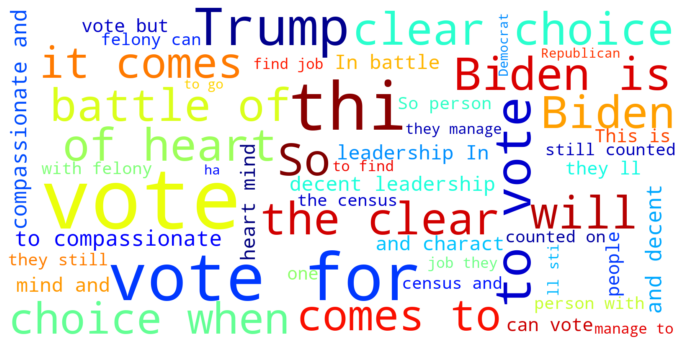

In [95]:
word_cloud(df_tws.text)

#### LES MOTS DANS LES TWEETS POSITIFS

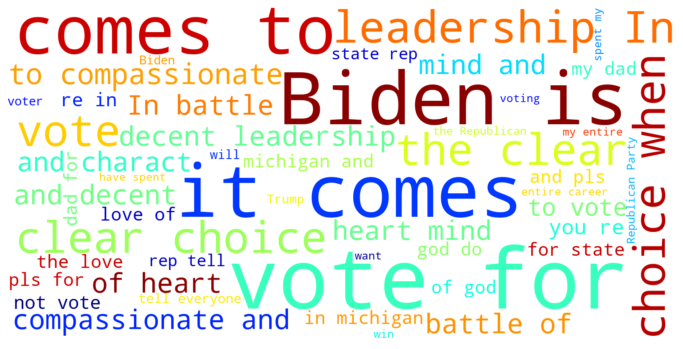

In [51]:
# Words in positive tweets
tws_pos = df_tws['text'][df_tws['sent'] == 1]
word_cloud(tws_pos)

#### LES MOTS DANS LES TWEETS NEGATIFS

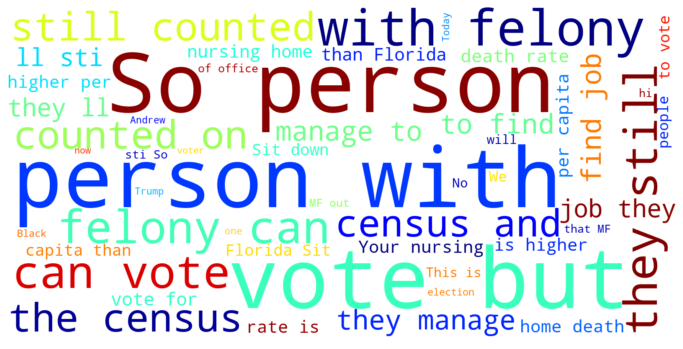

In [52]:
# Words in negative tweets
tws_pos = df_tws['text'][df_tws['sent'] == -1]
word_cloud(tws_pos)

#  7.COLLECTE DE HASHTAGS POSITIFS ET NEGATIFS 

In [96]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [97]:
# extracting hashtags from positive tweets

HT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])

# extracting hashtags from negative tweets
HT_negative = hashtag_extract(df_tws['text'][df_tws['sent'] == -1])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

# 8.LE PLOT DES HASHTAGS POSITIFS DANS LES TWEETS

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54060 missing from c

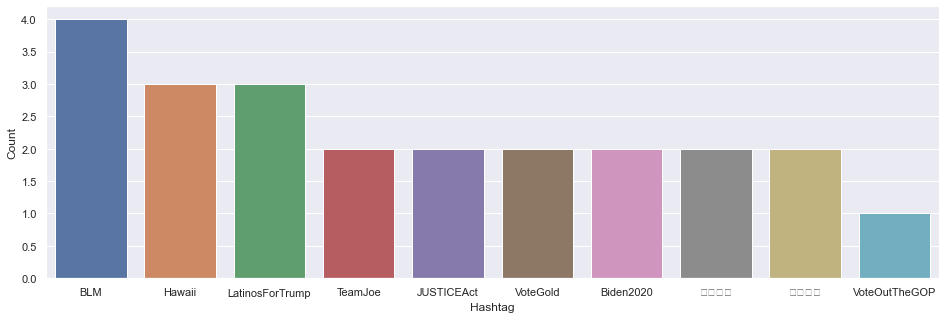

In [98]:
# Positive Tweets

a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# 9.LE PLOT DES HASHTAGS NEGATIFS DANS LES TWEETS 

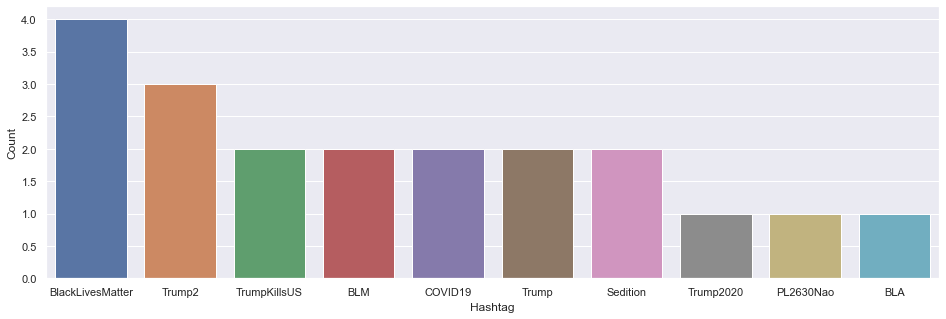

In [99]:
# Negative Tweets

b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# 10.COMPARAISON AVEC LES SENTIMENTS DES USERS CONCERNANT TRUMP:

In [101]:
filter_track = ['POTUS', 'vote']
file_name = 'TRUMPelection.csv'
twitter_stream_listener (file_name, filter_track, time_limit=60)


[INFO] Open file: [TRUMPelection.csv] and starting 60 seconds of streaming for ['POTUS', 'vote']

.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

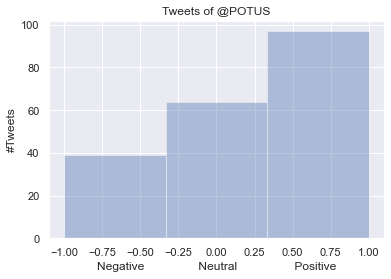

In [105]:
user_id = 'POTUS' 
tw_trump = list_tweets(user_id, count)
tw_trump = clean_tweets(tw_trump)
tw_trump_sent = anl_tweets(tw_trump, user_id)

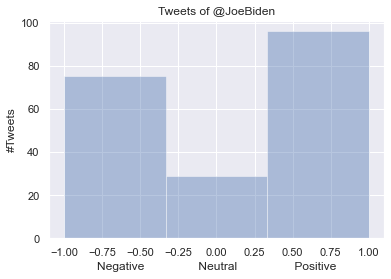

In [106]:
user_id = 'JoeBiden' 
tw_trump = list_tweets(user_id, count)
tw_trump = clean_tweets(tw_trump)
tw_trump_sent = anl_tweets(tw_trump, user_id)

# CONCLUSION

On voit que TRUMP et BIDEN ont le même score concernant les sentiments positives des utililisateurs en temps réel.
Mais on observe du plot que BIDEN a plus de sentiments négatifs par rapport à TRUMP .Ainsi , les sentiments neutre chez TRUMP sont plus élevé par rapport à BIDEN .

D'après cette analyse de sentiments en temps réél , il parait que TRUMP à plus de chance d'être de nouveau le président des united states .